In [1]:
%%html
<style>
body {
    font-family: "Times New Roman", cursive, sans-serif;
}
</style>   

# The Insurance Dataset
## Original data sourced from: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction by Anmol Kumar.

#### The background of the problem: 
#### The dataset was acquired from an Indian insurance company that once to find how likely an individual that has health insurance is likely to buy car insurance, symbolised by 1 and 0.
#### Aside from the interesting subject of the task, the main appeal of the data, is the richness of the data. There are lots of numeric and continuous type datatypes.

id: Unique ID for the customer

Gender:	Gender of the customer

Age: Age of the customer

Driving_License ->	0 : Customer does not have DL, 1 : Customer already has DL

Region_Code:	Unique code for the region of the customer

Previously_Insured ->	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age:	Age of the Vehicle

Vehicle_Damage ->	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium:	The amount customer needs to pay as premium in the year

PolicySalesChannel:	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage: Number of Days, Customer has been associated with the company

Response ->	1 : Customer is interested, 0 : Customer is not interested

In [2]:
import pandas as pd
import numpy as np

In [3]:
colnames = ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previuosly_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

In [4]:
py_df = pd.read_csv('train.csv')

In [5]:
py_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


sql used for inital data analysis


In [6]:
from ibm_db import connect


In [7]:
connection = connect('DATABASE=BLUDB;'
                     'HOSTNAME=dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net;'  # 127.0.0.1 or localhost works if it's local
                     'PORT=50000;'
                     'PROTOCOL=TCPIP;'
                     'UID=gnr93280;'
                     'PWD=h7srcw8mxhcnj3+b;', '', '')

In [8]:
def results(command):
    from ibm_db import fetch_assoc

    ret = []
    result = fetch_assoc(command)
    while result:
        ret.append(result)
        result = fetch_assoc(command)
    return ret  

In [9]:
from ibm_db import tables

t = results(tables(connection))

In [10]:
print(t[170])

{'TABLE_CAT': None, 'TABLE_SCHEM': 'SYSTOOLS', 'TABLE_NAME': 'EXPLAIN_STREAM', 'TABLE_TYPE': 'TABLE', 'REMARKS': None}


In [11]:
from ibm_db import exec_immediate

sql = 'SELECT * FROM ' + 'INSURANCE_TRAIN limit 10'  # Using our list of tables t from before...
rows = results(exec_immediate(connection, sql))

In [12]:
print(rows)

[{'id': 1, 'Gender': 'Male', 'Age': 44, 'Driving_License': 1, 'Region_Code': '28.0', 'Previously_Insured': 0, 'Vehicle_Age': '> 2 Years', 'Vehicle_Damage': 'Yes', 'Annual_Premium': '40454.0', 'Policy_Sales_Channel': '26.0', 'Vintage': 217, 'Response': 1}, {'id': 2, 'Gender': 'Male', 'Age': 76, 'Driving_License': 1, 'Region_Code': '3.0', 'Previously_Insured': 0, 'Vehicle_Age': '1-2 Year', 'Vehicle_Damage': 'No', 'Annual_Premium': '33536.0', 'Policy_Sales_Channel': '26.0', 'Vintage': 183, 'Response': 0}, {'id': 3, 'Gender': 'Male', 'Age': 47, 'Driving_License': 1, 'Region_Code': '28.0', 'Previously_Insured': 0, 'Vehicle_Age': '> 2 Years', 'Vehicle_Damage': 'Yes', 'Annual_Premium': '38294.0', 'Policy_Sales_Channel': '26.0', 'Vintage': 27, 'Response': 1}, {'id': 4, 'Gender': 'Male', 'Age': 21, 'Driving_License': 1, 'Region_Code': '11.0', 'Previously_Insured': 1, 'Vehicle_Age': '< 1 Year', 'Vehicle_Damage': 'No', 'Annual_Premium': '28619.0', 'Policy_Sales_Channel': '152.0', 'Vintage': 203, 

In [13]:
sql_df = pd.DataFrame.from_dict(rows)
sql_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [14]:
from ibm_db import exec_immediate

sql1 = 'SELECT count(*) FROM INSURANCE_TRAIN'  # Using our list of tables t from before...
rows1 = results(exec_immediate(connection, sql1))

In [15]:
print(rows1)

[{'1': '381109'}]


In [16]:
sql2 = 'SELECT AVG("Annual_Premium") FROM INSURANCE_TRAIN  limit 10;'
rows2 = results(exec_immediate(connection, sql2))

In [17]:
print(rows2)

[{'1': '30564.389581458322946978423495'}]


In [18]:
py_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
py_df['Annual_Premium'].mean()

30564.389581458323

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

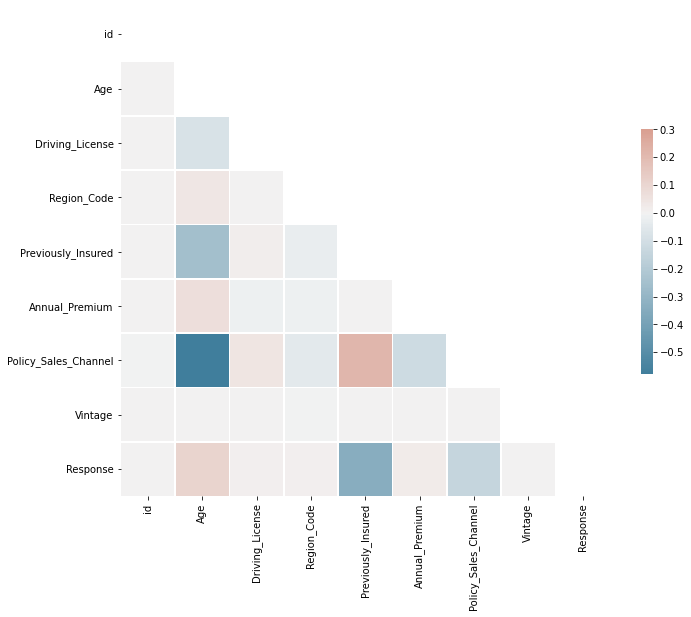

In [23]:

corr = py_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.color_palette("mako")

In [24]:
py_df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [25]:
np.sort(py_df['Region_Code'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52.])

In [26]:
prem_an = py_df['Annual_Premium']

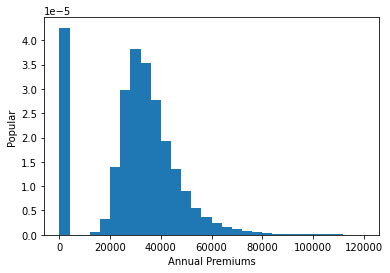

In [27]:
plt.hist(prem_an, range=[0, 120000], density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Popular')
plt.xlabel('Annual Premiums');

### this is interesting as the data is bimodal and the second peak is almost perfectly binomial.

In [28]:
vint = py_df['Vintage']

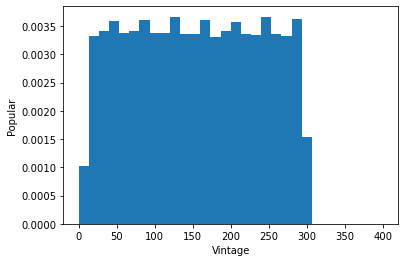

In [29]:
plt.hist(vint, range=[0, 400], density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Popular')
plt.xlabel('Vintage');

In [30]:
df_count = (py_df[['Vehicle_Damage']] == 'No').sum()

In [31]:
len(py_df)

381109

In [32]:
def percentValues(el):
    theSplit = py_df[el].value_counts()
    Perc = (theSplit[0]/(theSplit[1] + theSplit[0]))*100
    percent = "{}%".format(Perc)
    return theSplit, percent

In [33]:
print(percentValues('Vehicle_Damage'))

(Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64, '50.48765576252463%')


In [34]:
print(percentValues('Response'))

(0    334399
1     46710
Name: Response, dtype: int64, '87.74366388618479%')


In [35]:
print(percentValues('Previously_Insured'))

(0    206481
1    174628
Name: Previously_Insured, dtype: int64, '54.17898816349128%')


In [36]:
print(percentValues('Driving_License'))

(1    380297
0       812
Name: Driving_License, dtype: int64, '0.21306240471885995%')


In [37]:
agedf = py_df['Age']

In [38]:
print(percentValues('Gender'))

(Male      206089
Female    175020
Name: Gender, dtype: int64, '54.07613045086839%')


In [39]:
'''first_indx = [0, 0, 0, 0]
second_indx = [1, 3, 2, 10]

X_train = df_train[state_cols].values
y_train = df_train.defaulter.values # .reshape(-1,1)


if num_plots % 2 == 0:
    f, axs = plt.subplots(num_plots // 2, 2)
else:
    f, axs = plt.subplots(num_plots// 2 + 1, 2)
f.set_figheight(10.0)
f.set_figwidth(10.0)
    

        
    axs[first_idx,second_idx].plot(X_train[y_train == 1.0, first_indx[i]], 
                                   X_train[y_train == 1.0, second_indx[i]], 'r^', label="Failed")    
    axs[first_idx, second_idx].legend()
    axs[first_idx, second_idx].set_xlabel('%s' % state_cols[first_indx[i]])
    axs[first_idx, second_idx].set_ylabel('%s' % state_cols[second_indx[i]])
    axs[first_idx, second_idx].set_title('Failed banks vs non-failed banks')
    axs[first_idx, second_idx].grid(True) 
    
if num_plots % 2 != 0:
    f.delaxes(axs[i // 2, 1])'''

'first_indx = [0, 0, 0, 0]\nsecond_indx = [1, 3, 2, 10]\n\nX_train = df_train[state_cols].values\ny_train = df_train.defaulter.values # .reshape(-1,1)\n\n\nif num_plots % 2 == 0:\n    f, axs = plt.subplots(num_plots // 2, 2)\nelse:\n    f, axs = plt.subplots(num_plots// 2 + 1, 2)\nf.set_figheight(10.0)\nf.set_figwidth(10.0)\n    \n\n        \n    axs[first_idx,second_idx].plot(X_train[y_train == 1.0, first_indx[i]], \n                                   X_train[y_train == 1.0, second_indx[i]], \'r^\', label="Failed")    \n    axs[first_idx, second_idx].legend()\n    axs[first_idx, second_idx].set_xlabel(\'%s\' % state_cols[first_indx[i]])\n    axs[first_idx, second_idx].set_ylabel(\'%s\' % state_cols[second_indx[i]])\n    axs[first_idx, second_idx].set_title(\'Failed banks vs non-failed banks\')\n    axs[first_idx, second_idx].grid(True) \n    \nif num_plots % 2 != 0:\n    f.delaxes(axs[i // 2, 1])'

In [40]:
#plt.hist(py_df['Age'], py_df['Annual_Premium'] range=[16, 100], density=True, bins=20)  # `density=False` would make counts
#plt.ylabel('Popular')
#plt.xlabel('Vintage');

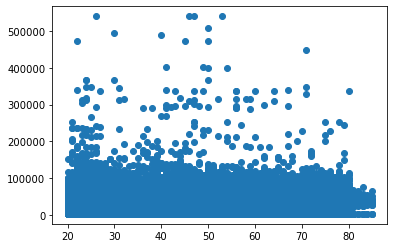

In [41]:
plt.plot(py_df['Age'], py_df['Annual_Premium'], 'o')

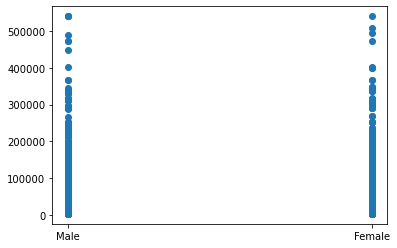

In [42]:
plt.plot(py_df['Gender'], py_df['Annual_Premium'], 'o')

In [43]:
male_df = py_df[py_df.Gender == 'Male']
male_df = male_df.reset_index(drop=True)
female_df = py_df[py_df.Gender == 'Female']
female_df = female_df.reset_index(drop=True)

In [44]:
print(male_df)

            id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1   Male   44                1         28.0                   0   
1            2   Male   76                1          3.0                   0   
2            3   Male   47                1         28.0                   0   
3            4   Male   21                1         11.0                   1   
4            7   Male   23                1         11.0                   0   
...        ...    ...  ...              ...          ...                 ...   
206084  381104   Male   47                1         50.0                   0   
206085  381105   Male   74                1         26.0                   1   
206086  381106   Male   30                1         37.0                   1   
206087  381107   Male   21                1         30.0                   1   
206088  381109   Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annu

(array([7.4777e+04, 9.2716e+04, 6.6780e+03, 6.2300e+02, 1.1100e+02,
        3.2000e+01, 2.0000e+01, 1.0000e+01, 1.1000e+01, 6.0000e+00,
        7.0000e+00, 1.2000e+01, 8.0000e+00, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  2630.  ,  29506.75,  56383.5 ,  83260.25, 110137.  , 137013.75,
        163890.5 , 190767.25, 217644.  , 244520.75, 271397.5 , 298274.25,
        325151.  , 352027.75, 378904.5 , 405781.25, 432658.  , 459534.75,
        486411.5 , 513288.25, 540165.  ]),
 <BarContainer object of 20 artists>)

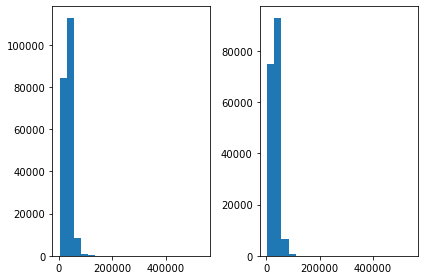

In [45]:

n_bins = 20

fig, axs = plt.subplots(1, 2, sharex=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(male_df['Annual_Premium'], bins=n_bins)
axs[1].hist(female_df['Annual_Premium'], bins=n_bins)

In [46]:
def janitor(dataframe):
    dataframe.Vehicle_Damage.replace(('Yes', 'No'), (1, 0), inplace=True)
    dataframe.Vehicle_Age.replace(('< 1 Year', '1-2 Year','> 2 Years'), (1, 2, 5), inplace=True)
    dataframe.rename(columns={"Gender": "Male"}, inplace=True)
    dataframe.Male.replace(('Male', 'Female'), (1, 0), inplace=True)

In [47]:
janitor(py_df)

In [48]:
py_df.head()

,id,Male,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,5,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,5,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [105]:
from sklearn import neighbors, linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [106]:
from sklearn import tree
single_tree = DecisionTreeClassifier(min_samples_split=50,
                                      min_weight_fraction_leaf=0.01, min_impurity_split=0.1, class_weight="balanced")

In [125]:
trainx = py_df.drop(['Response','id'], axis=1)
trainy = py_df['Response']

In [126]:
if single_tree is not None:
    # threshold : Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] 
    # represents no instances being predicted and is arbitrarily set to max(y_score) + 1.
    clf = single_tree.fit(trainx.values, trainy.values)

C:\ANACONDA\envs\tf\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[Text(136.83848684210528, 210.645, 'X[6] <= 0.5\ngini = 0.5\nsamples = 381109\nvalue = [190554.5, 190554.5]'),
 Text(130.96480263157895, 197.055, 'gini = 0.07\nsamples = 188696\nvalue = [106967.268, 4006.091]'),
 Text(142.7121710526316, 197.055, 'X[4] <= 0.5\ngini = 0.427\nsamples = 192413\nvalue = [83587.232, 186548.409]'),
 Text(136.83848684210528, 183.465, 'X[1] <= 26.5\ngini = 0.416\nsamples = 182491\nvalue = [77982.269, 186197.57]'),
 Text(23.494736842105265, 169.875, 'X[8] <= 158.5\ngini = 0.5\nsamples = 35779\nvalue = [17987.054, 17191.108]'),
 Text(17.621052631578948, 156.285, 'X[8] <= 150.5\ngini = 0.499\nsamples = 28055\nvalue = [13848.863, 15306.369]'),
 Text(11.747368421052633, 142.695, 'gini = 0.448\nsamples = 4082\nvalue = [1827.482, 3569.582]'),
 Text(23.494736842105265, 142.695, 'X[0] <= 0.5\ngini = 0.5\nsamples = 23973\nvalue = [12021.381, 11736.786]'),
 Text(11.747368421052633, 129.10500000000002, 'X[3] <= 27.5\ngini = 0.495\nsamples = 13074\nvalue = [6687.093, 5462.4

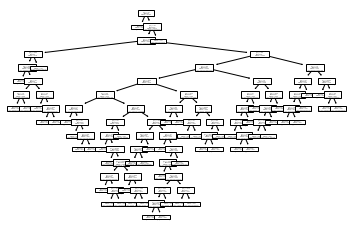

In [127]:
from sklearn import tree
tree.plot_tree(clf)

In [128]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

In [135]:
feats = colnames[1:-1]

In [136]:
print(feats)

['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previuosly_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [137]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feats,  
                    filled=True, rounded=True,  
                                  special_characters=True)  
graph = graphviz.Source(dot_data)  

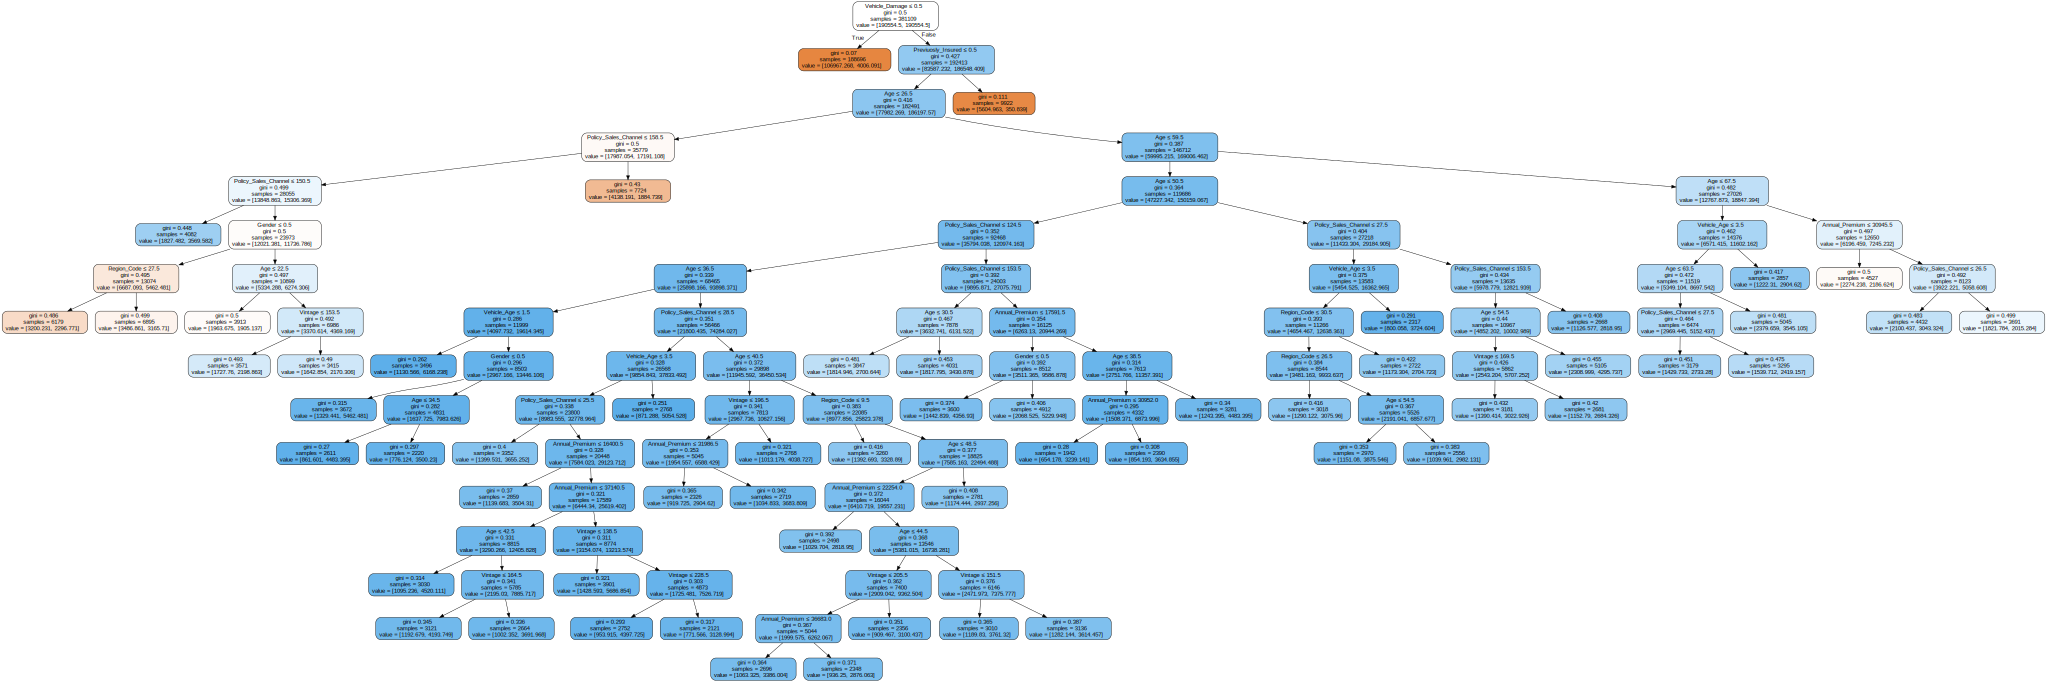

In [138]:
graph


In [139]:
hypoer = RandomSearchCV

NameError: name 'RandomSearchCV' is not defined

In [141]:
test_df = pd.read_csv('test.csv')

In [142]:
janitor(test_df)

In [147]:
test_df = test_df.drop(['id'], axis=1)

In [148]:
test_df.head()

,Male,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,1,40,1,28.0,0,2,1,33762.0,7.0,111
2,1,47,1,28.0,0,2,1,40050.0,124.0,199
3,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,1,27,1,28.0,1,1,0,59097.0,152.0,297


this cell doesn't have the response of the test data, this is found in the submission.csv file

In [149]:
sub_df = pd.read_csv('sample_submission.csv')

In [150]:
sub_df.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [151]:
correctassign = sub_df.drop(['id'], axis=1)

In [152]:
y_pred = clf.predict(test_df)

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(correctassign, y_pred)

0.5982509032801467